In [82]:
from scipy import stats
from scipy.stats import norm
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
import math
# %matplotlib notebook

# https://towardsdatascience.com/understanding-the-68-95-99-7-rule-for-a-normal-distribution-b7b7cbf760c2

In [48]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [49]:
norm.cdf(2) - norm.cdf(-2)

0.9544997361036416

In [50]:
norm.cdf(3) - norm.cdf(-3)

0.9973002039367398

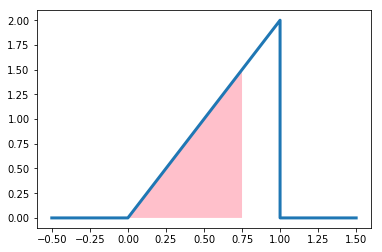

In [77]:
x = np.array([-0.5, 0, 1, 1, 1.5])
y = np.array([0, 0, 2, 0, 0])
plt.plot(x,  y, lw=3)
plt.fill(np.array([0, 0.75, 0.75]), np.array([0, 1.5, 0]), "pink")
plt.show()
# https://digitalsynopsis.com/design/color-thesaurus-correct-names-of-shades/

In [57]:
beta.cdf(0.75, 2, 1)

0.5625

In [58]:
beta.cdf(np.array([0.4, 0.5, 0.6]), 2, 1)

array([0.16, 0.25, 0.36])

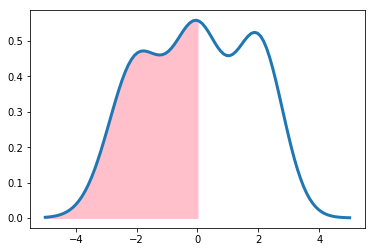

In [108]:
def func1(x):
    return norm.pdf(x, -2, 0.9) + norm.pdf(x, 2, 0.8) + norm.pdf(x, 0, 0.8)

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
y = func1(x)
plt.plot(x, y, lw=3)
x1 = np.linspace(mu - 5*sigma, 0, 50)
plt.fill_between(x1, func1(x1), color="pink")
plt.show()

In [110]:
beta.ppf(0.5, 2, 1)
# bring in the Monty-Hall problem
# https://www.youtube.com/watch?v=i7OY7CZUdIY
# https://www.youtube.com/watch?v=8DMnAAvakh0
# introduce precision & recall, with specificity and sensitivity

0.7071067811865475

In [2]:
1 + 2

3

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

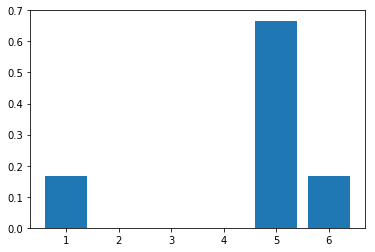

In [7]:
x = [1, 2, 3, 4, 5, 6]
y = [1/6, 0/6, 0/6, 0/6, 4/6, 1/6]
plt.bar(x, y)
plt.show()

In [8]:
[x for x in range(6)]

[0, 1, 2, 3, 4, 5]

In [9]:
d = {}
for i in range(6):
    d[i+1] = 1/6

In [10]:
d.items()

dict_items([(1, 0.16666666666666666), (2, 0.16666666666666666), (3, 0.16666666666666666), (4, 0.16666666666666666), (5, 0.16666666666666666), (6, 0.16666666666666666)])

In [11]:
def cummulate(a, d):
    r = {}
    for k1, v1 in a.items():
        for k2, v2 in d.items():
            r[k1+k2] = v1*v2 if r.get(k1+k2) is None else v1*v2 + r[k1+k2]
    return r

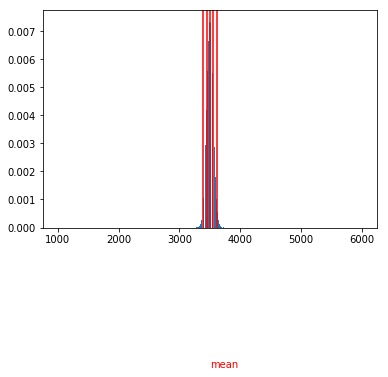

mean: 3503.500000 var: 2919.583333 std: 54.033169


In [57]:
r = d
for i in range(1000):
    r = cummulate(r, d)
    
mean = np.sum(np.array(list(r.keys())) * np.array(list(r.values())))
var = np.sum(np.array(list(r.values())) * np.square(np.array(list(r.keys())) - mean))
std = np.sqrt(var)
x, y = r.keys(), r.values()

plt.bar(x, y)
plt.axvline(x=mean, color='red')
plt.axvline(x=mean-std, color='red')
plt.axvline(x=mean+std, color='red')
plt.axvline(x=mean-2*std, color='red')
plt.axvline(x=mean+2*std, color='red')
plt.text(mean-5,-0.005,'mean', color='red')
plt.show()

print('mean: %f var: %f std: %f' % (mean, var, std))
#np.sum(np.array(list(r.keys())) * np.array(list(r.values())))
mask = np.logical_and(list(r.keys()) > mean-std, list(r.keys()) < mean+std)  
first = np.sum(np.array(list(r.keys()))[mask] * np.array(list(r.values()))[mask])

In [58]:
mean = np.sum(np.array(list(r.keys())) * np.array(list(r.values())))

In [62]:
first / mean / 2

0.3411740383130233

In [65]:
mask = np.logical_and(list(r.keys()) > mean-2*std, list(r.keys()) < mean+2*std)  
second = np.sum(np.array(list(r.keys()))[mask] * np.array(list(r.values()))[mask])
second / mean / 2 - first / mean / 2

0.1360166950236984

In [68]:
mask = np.logical_and(list(r.keys()) > mean-3*std, list(r.keys()) < mean+3*std)  
third = np.sum(np.array(list(r.keys()))[mask] * np.array(list(r.values()))[mask])
third / mean / 2 - first / mean / 2 - (second / mean / 2 - first / mean / 2)

0.02145560199691393